In [23]:
import pandas as pd
import csv
import math 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

Data Structure: 

0	Message ID $GPGSA

1	Mode 1, M = manual, A = automatic

2	Mode 2, Fix type, 1 = not available, 2 = 2D, 3 = 3D

3	PRN number, 01 through 32 for GPS, 33 through 64 for SBAS, 64+ for GLONASS

4	PDOP: 0.5 through 99.9

5	HDOP: 0.5 through 99.9

6	VDOP: 0.5 through 99.9

7	The checksum data, always begins with *


Generate dummy data at https://www.nmeagen.org/ 


In [24]:
NMEA = pd.read_csv('nmea.csv', names=['NMEA_Sentence', 'Data2', 'Data3', 'Data4', 'Data5', 'Data6', 'Data7', 'Data8', 'Data9', 'Data10', 'Data11', 'Data12', 'Data13','Data14', 'Data15', 'Data16', 'Data17', 'Data18', 'Data19', 'Data20', 'Data21'])

#NMEA.dropna(inplace=True)
NMEA[:9]
#len(NMEA)

,NMEA_Sentence,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Data9,Data10,...,Data12,Data13,Data14,Data15,Data16,Data17,Data18,Data19,Data20,Data21
0,$GPGGA,135223.067,5230.813,N,01324.060,E,1,12.0,1.0,0.0,...,0.0,M,NaN,*67,NaN,NaN,NaN,NaN,NaN,NaN
1,$GPGSA,A,3,01,02,03,04,5.0,6.0,7.0,...,09,10,11.0,12,1.0,1.0,1.0*30,NaN,NaN,NaN
2,$GPRMC,135223.067,A,5230.813,N,01324.060,E,2835241.7,356.6,160321.0,...,W*7E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,$GPGGA,135223.068,5231.600,N,01324.014,E,1,12.0,1.0,0.0,...,0.0,M,NaN,*66,NaN,NaN,NaN,NaN,NaN,NaN
4,$GPGSA,A,3,01,02,03,04,5.0,6.0,7.0,...,09,10,11.0,12,1.0,1.0,1.0*30,NaN,NaN,NaN
5,$GPRMC,135223.068,A,5231.600,N,01324.014,E,2142843.4,86.7,160321.0,...,W*72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,$GPGGA,135223.069,5231.656,N,01324.987,E,1,12.0,1.0,0.0,...,0.0,M,NaN,*67,NaN,NaN,NaN,NaN,NaN,NaN
7,$GPGSA,A,3,01,02,03,04,5.0,6.0,7.0,...,09,10,11.0,12,1.0,1.0,1.0*30,NaN,NaN,NaN
8,$GPRMC,135223.069,A,5231.656,N,01324.987,E,5033667.8,141.1,160321.0,...,W*7B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df = pd.DataFrame(NMEA)
#print(df)
fix_avail_data=df.loc[df["Data3"] == "3"] # 3 indicates 3D fix, 2 2D fix, and 1 No Fix
gpgsa= fix_avail_data.loc[df["NMEA_Sentence"] == "$GPGSA"]
gpgsa


,NMEA_Sentence,Data2,Data3,Data4,Data5,Data6,Data7,Data8,Data9,Data10,...,Data12,Data13,Data14,Data15,Data16,Data17,Data18,Data19,Data20,Data21
1,$GPGSA,A,3,01,02,03,04,5.0,6.0,7.0,...,09,10,11.0,12,1.0,1.0,1.0*30,NaN,NaN,NaN
4,$GPGSA,A,3,01,02,03,04,5.0,6.0,7.0,...,09,10,11.0,12,1.0,1.0,1.0*30,NaN,NaN,NaN
7,$GPGSA,A,3,01,02,03,04,5.0,6.0,7.0,...,09,10,11.0,12,1.0,1.0,1.0*30,NaN,NaN,NaN
10,$GPGSA,A,3,01,02,03,04,5.0,6.0,7.0,...,09,10,11.0,12,1.0,1.0,1.0*30,NaN,NaN,NaN
13,$GPGSA,A,3,01,02,03,04,5.0,6.0,7.0,...,09,10,11.0,12,1.0,1.0,1.0*30,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,$GPGSA,A,3,01,02,03,04,5.0,6.0,7.0,...,09,10,11.0,12,1.0,1.0,1.0*30,NaN,NaN,NaN
9145,$GPGSA,A,3,01,02,03,04,5.0,6.0,7.0,...,09,10,11.0,12,1.0,1.0,1.0*30,NaN,NaN,NaN
9148,$GPGSA,A,3,01,02,03,04,5.0,6.0,7.0,...,09,10,11.0,12,1.0,1.0,1.0*30,NaN,NaN,NaN
9151,$GPGSA,A,3,01,02,03,04,5.0,6.0,7.0,...,09,10,11.0,12,1.0,1.0,1.0*30,NaN,NaN,NaN


In [26]:
pdop = gpgsa.Data16
hdop = gpgsa.Data17
#print(pdop[:5],hdop[:5])

In [27]:
vdop = gpgsa.Data18
vdop = vdop.str.split(pat="*", expand = True) #split vdop and CRC in 2 cols
vdop = vdop[0]
#vdop


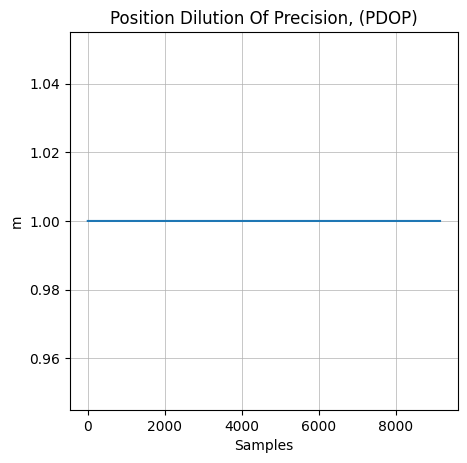

In [28]:
pdop = pdop.astype(float)
figure (num = None, figsize=(5,5), dpi=100, facecolor='w', edgecolor='k')
plt.title("Position Dilution Of Precision, (PDOP)")
plt.xlabel("Samples")
plt.ylabel("m")
pdop.plot()
plt.grid(linewidth = 0.5)

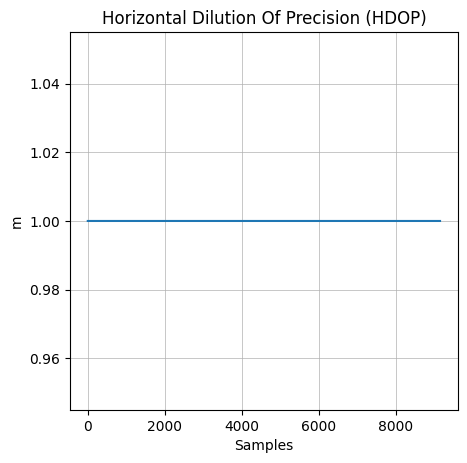

In [29]:
hdop = hdop.astype(float)
figure(num=None, dpi=100, figsize=(5,5))
plt.title('Horizontal Dilution Of Precision (HDOP)')
plt.xlabel('Samples')
plt.ylabel('m')
hdop.plot()
plt.grid(linewidth = 0.5)

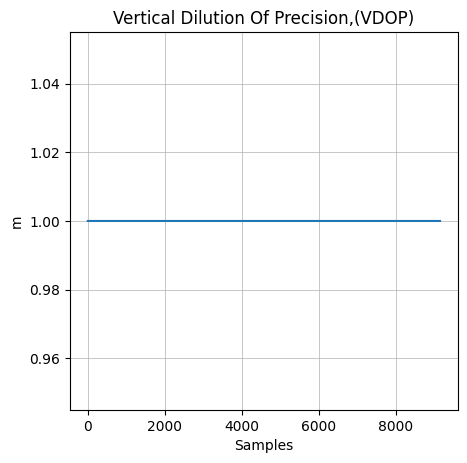

In [30]:
vdop = vdop.astype(float)
figure(num=None, dpi=100, figsize=(5,5))
plt.title("Vertical Dilution Of Precision,(VDOP)")
plt.xlabel("Samples")
plt.ylabel('m')
vdop.plot()
plt.grid(linewidth = 0.5)

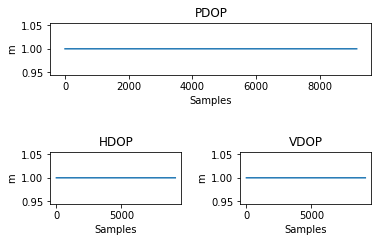

In [31]:
#PDOP graph
plt.subplot(2,1,1)
plt.plot(pdop)
plt.title("PDOP")
plt.xlabel("Samples")
plt.ylabel("m")
#HDOP subplot
plt.subplot(2,2,3)
plt.tight_layout()
plt.title("HDOP")
plt.xlabel("Samples")
plt.ylabel("m")
plt.plot(hdop)
#VDOP subplot
plt.subplot(2,2,4)
plt.tight_layout(pad =3)
plt.title("VDOP")
plt.xlabel("Samples")
plt.ylabel("m")
plt.plot(vdop)
